In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from matplotlib import rc
rc('font', family='AppleGothic') 			## 애플 폰트 추가로
plt.rcParams['axes.unicode_minus'] = False  ## 한글 깨짐 방지

### 회귀의 선형 모델

y = w[0] * x[0] + b

이 식에서 w[0]는 기울기고 b는 y축을 만나는 절편입니다.

특성이 많아지면 w는 각 특성에 해당하는 기울기를 모두 가집니다.
다르게 생각하면 예측값은 입력 특성에 w의 각 가중치를 곱해서 더한 가중치의 합으로 볼 수 있습니다.

1차원 wave 데이터셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시켜보겠습니다.

w[0]: 0.393906  b: -0.031804


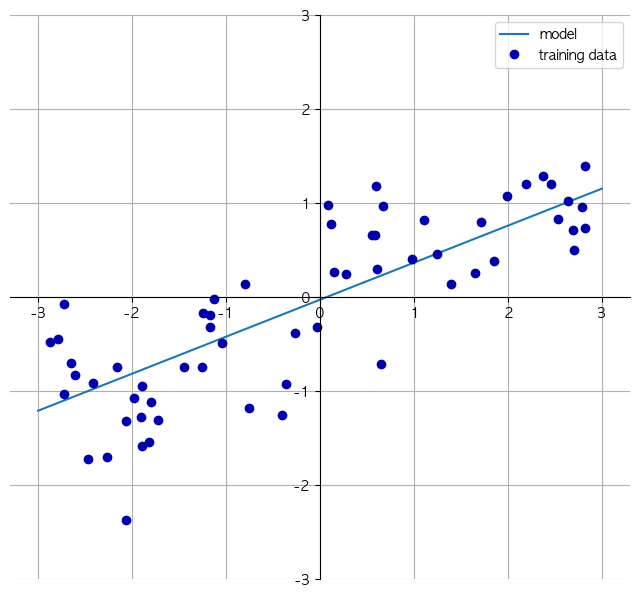

In [5]:
mglearn.plots.plot_linear_regression_wave()

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차우너(특성이 더 많음)에서는 초평면(hyperplane)dㅣ 되는 회귀 모델의 특징을 가지고 있습니다.

이 직선과 KNeighborsRegressor를 사용해 만든 선과 비교해보면 직선을 사용한 예측이 더 제약이 많아 보입니다. 즉 데이터의 상세 정보를 잃어버린 것처럼 보입니다.

어느정도는 사실입니다만, 타깃 y가 특성들의 선형 조합이라는 것은 매우 과한 (때론 비현실적인) 가정입니다. 1차원 데이터만 놓고 봐서 생긴 편견일 수 있습니다. 

특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있습니다. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 (훈련 세트에 대해서) 선형 함수로 모델링할 수 있습니다.

회귀를 위한 선형 모델은 다양합니다. 이 모델들은 훈련 데이터로부터 모델 파라비터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에선 차이가 납니다.

#### 선형 회귀(최소 제곱법)

선형 회귀(linear regression) 또는 최소제곱법(OLS, ordinarty least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘입니다. 선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾습니다. 평균제곱오차는 예측값과 타깃 값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것입니다. 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없습니다.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [7]:
print("lr.coef_:", lr.coef_)
print("lr.intercept:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept: -0.03180434302675976


In [8]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


R^2값이 0.66인 것은 좋은 결과는 아닙니다. 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷한 것을 보아 이는 과대적합이 아니라 과소적합인 상태를 의미합니다.

In [9]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [10]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합 되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 합니다. 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 다음에 볼 리지 회귀입니다.

### 리지 회귀

리지(Ridge)도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용합니다. 하지만 리지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있습니다. 가중치의 절대값을 가능한 한 작게 만드는 것입니다. 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원합니다. 직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만듭니다(기울기를 작게 만듭니다).

이런 제약을 규제(regulariztion)이라고 합니다. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미입니다. 리지 회귀에 사용하는 규제 방식을 L2 규제라고 합니다.

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


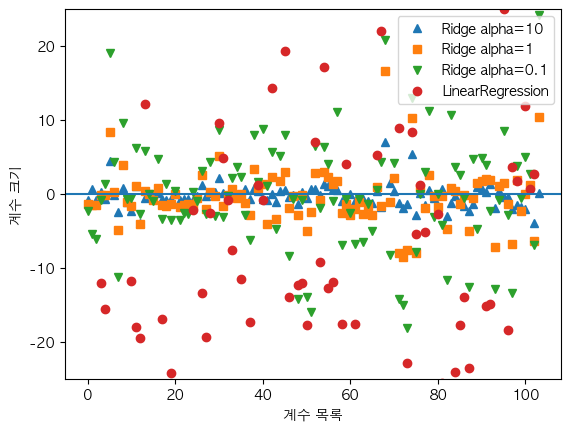

In [14]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

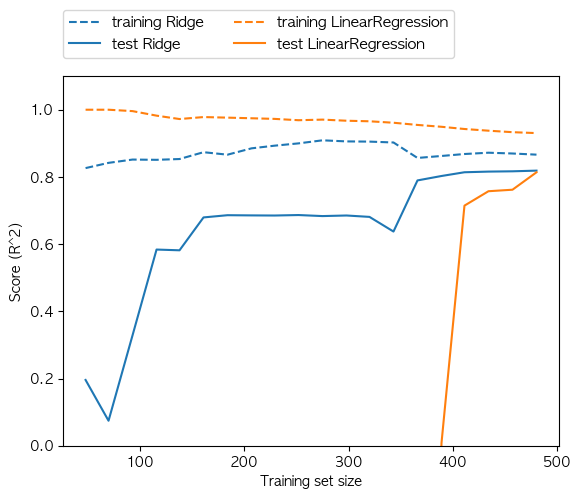

In [15]:
mglearn.plots.plot_ridge_n_samples()

#### 라소

선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있습니다. 리지 회귀에서와 같이 라소(lasso)도 계수를 0에 가깝게 만들려고 합니다. 하지만 방식이 조금 다르며 이를 L1 규제라고 합니다. 

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [17]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

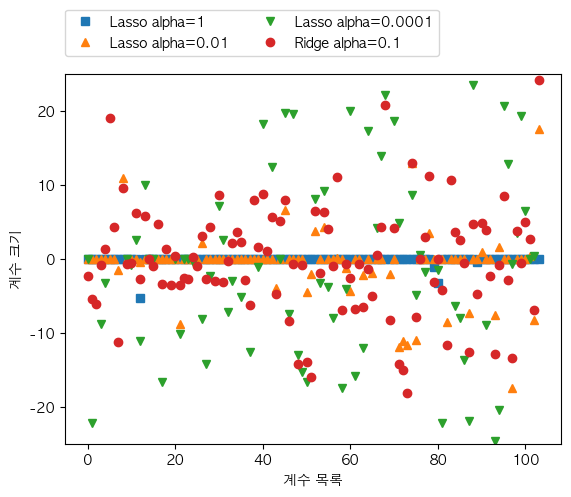

In [19]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

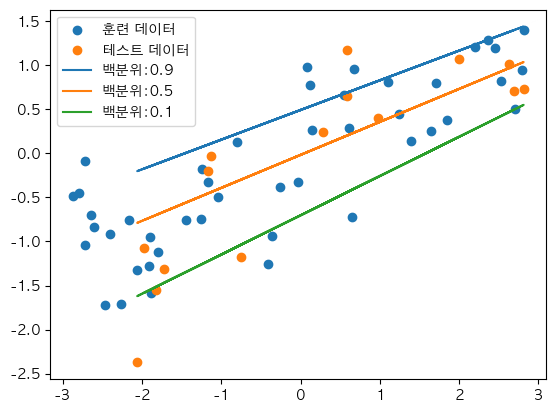

In [20]:
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train) \
            .predict(X_test)
pred_med = QuantileRegressor(quantile=0.5, alpha=0.01).fit(X_train, y_train) \
            .predict(X_test)
pred_low = QuantileRegressor(quantile=0.1, alpha=0.01).fit(X_train, y_train) \
            .predict(X_test)

plt.scatter(X_train, y_train, label='훈련 데이터')
plt.scatter(X_test, y_test, label='테스트 데이터')
plt.plot(X_test, pred_up, label='백분위:0.9')
plt.plot(X_test, pred_med, label='백분위:0.5')
plt.plot(X_test, pred_low, label='백분위:0.1')
plt.legend()
plt.show()

### 분류용 선형 모델

분류용 선형 모델에서는 결정 경계가 입력의 선형 함수입니다. 다른 말로하면 선형 분류기느 두 개의 클래스를 구분하는 분류기입니다.

선형 모델을 학습시키는 알고리즘은 다양한데, 다음의 두 방법으로 구부할 수 있습니다. 

- 특정 계수와 절편의 조합이 훈렵 데이터에 얼마나 잘 맞는지 층적하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

가장 날리 알려진 두 개의 선형 분류 알고리즘은 로지스틱 회귀(logistic regression)와 선형 서포트 벡터 머신(support vector machine)입니다. </br></br>

LogisticRegression은 이름에 "Regresion(회귀)"가 들어가지만 회귀 알고리즘이 아니라 분류 알고리즘이므로 LinearRegression과 혼동하면 안 됩니다.

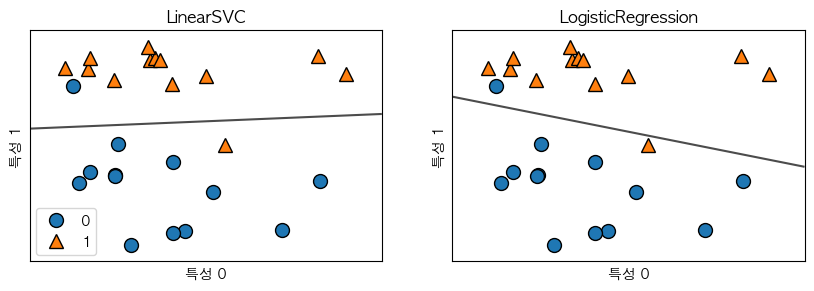

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

LogisticRegression으로 만든 결정 경계가 직선으로 표현되었고 위쪽은 클래스 1, 아래쪽은 클래스 0으로 나누고 있습니다. 

다르게 말하면 새로운 데이터가 이 직선 위쪽에 놓이면 클래스1, 직선 아래쪽에 놓이면 클래스 0으로 분류될 것입니다. 

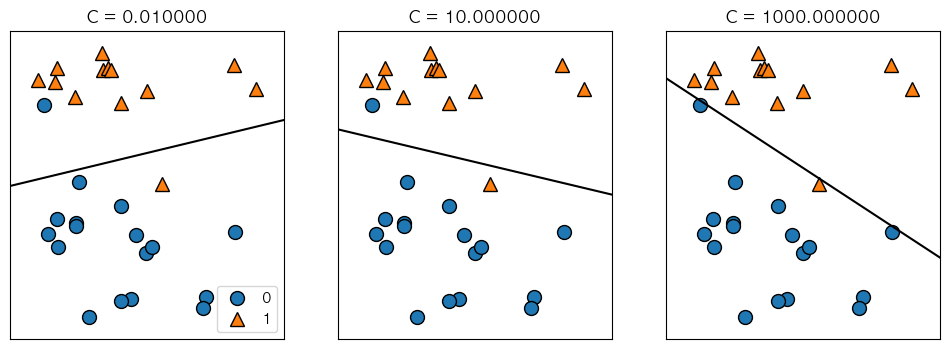

In [22]:
mglearn.plots.plot_linear_svc_regularization()

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [26]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


/Users/ddm/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


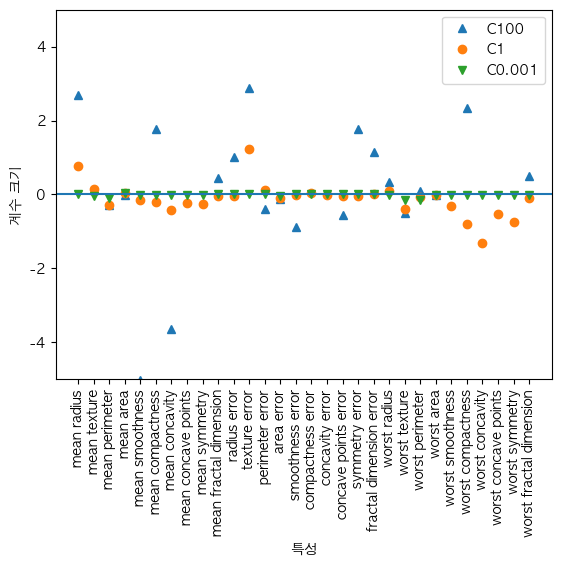

In [32]:
plt.plot(logreg100.coef_.T, '^', label="C100")
plt.plot(logreg.coef_.T, 'o', label="C1")
plt.plot(logreg001.coef_.T, 'v', label="C0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도 0.98


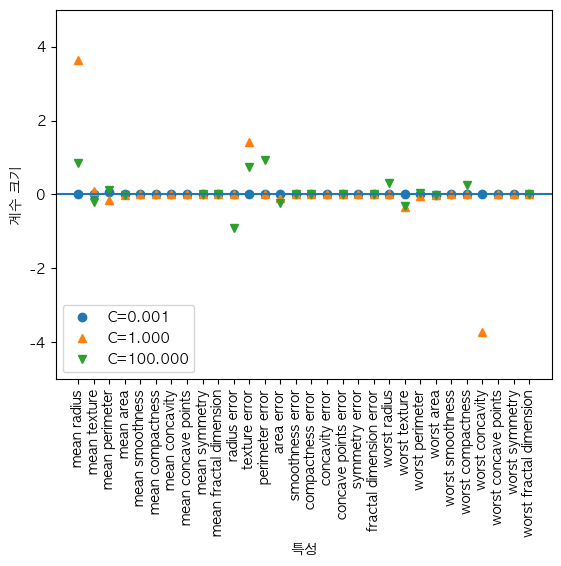

In [36]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도 {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)